# Masking of Vegetation and shadows  

In [1]:
import HyDefinitions as HD
import os
from spectral import*
import numpy as np


ImageView object:
  Display bands       :  [0, 25, 49]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.5500612258911133, 1.4661638736724854]
    G: [-1.6262000799179077, 1.0492594242095947]
    B: [-2.8881702423095703, 2.6124958992004395]

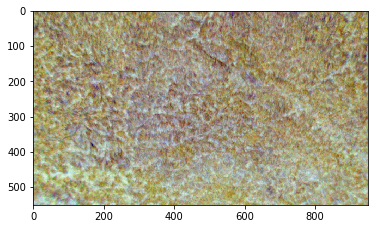

In [2]:
FILENAME ="/Users/sandra/Documents/Testdata/JupyterTest/reg/ELC/Calib_K00640reg_ELC.hdr"
dat=envi.open(FILENAME)
im=dat.load()
wllist=[np.float(x) for x in envi.open(FILENAME).metadata["wavelength"]]
imshow(im)

ImageView object:
  Display bands       :  [0, 25, 49]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.5500612258911133, 1.1774697303771973]
    G: [-1.6262000799179077, 1.0277698040008545]
    B: [-2.571913719177246, 2.033700466156006]

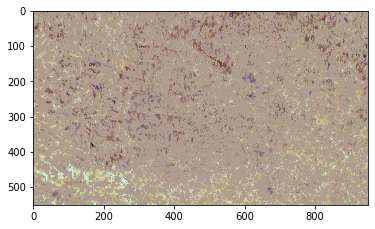

In [3]:
im_N=HD.NDVImask(im, wllist, NDVI_Threshold=0.28)
imshow(im_N)

ImageView object:
  Display bands       :  [0, 25, 49]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-1.1064621210098267, 1.1774697303771973]
    G: [-0.5292607545852661, 1.0277698040008545]
    B: [-0.9746246337890625, 2.033700466156006]

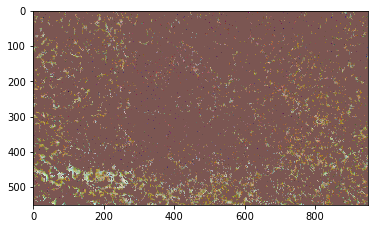

In [4]:
im_ND = HD.DarkMask(im_N, Dark_Threshold=0.0)
imshow(im_ND)

In [8]:
envi.save_image(FILENAME[:-4]+"_NDmask.hdr",im_ND, ext="", interleave="bsq", metadata=dat.metadata)

Saving /Users/sandra/Documents/Testdata/JupyterTest/reg/ELC/Calib_K00640reg_ELC_NDmask
